In [547]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


### Loading data from file to dataframe and glancing at it.

In [548]:
boombikes = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [549]:
boombikes.shape

(730, 16)

In [550]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Categorical Variables
    
    1. season
    2. yr
    3. month
    4. holiday
    5. weekday
    6. workingday
    7. weathersit

#### Numerical Variables

    1. temp
    2. atemp
    3. hum
    4. windspeed
    5. casual
    6. registered

In [551]:
# Checking for missing values
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### No missing values in the dataset.

In [552]:
# Dropping the variables 'instant','dteday','casual','registered' as they are not required for the analysis.
boombikes = boombikes.drop(['instant','dteday','casual','registered'], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [553]:
# Renaming columns for better understanding
boombikes = boombikes.rename(columns = {'yr':'year','mnth':'month','weathersit':'weather','hum':'humidity','cnt':'count'})
boombikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Let's first analyze impact of categorical variables on the demand of bikes.

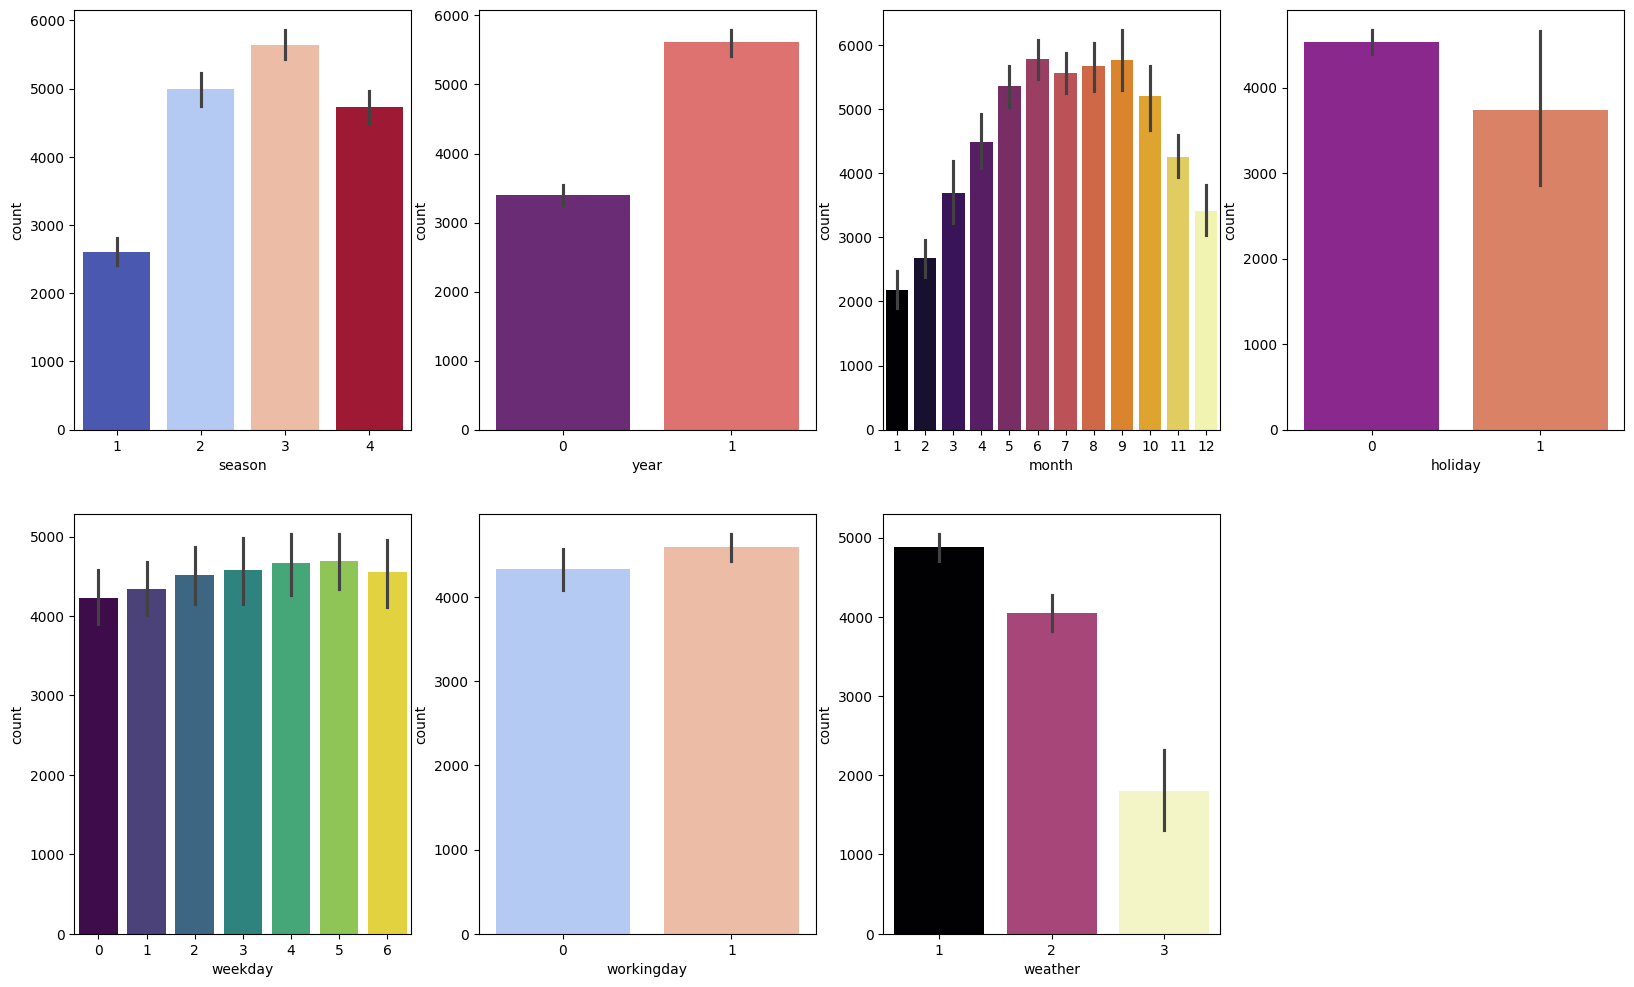

In [554]:
# Ploting the distribution of the target variable 'count' against multiple categorical variables 
# to understand the impact of these variables on the demand of bikes.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'count', data = boombikes, palette = 'coolwarm', hue='season', legend=False)
plt.subplot(2,4,2)
sns.barplot(x = 'year', y = 'count', data = boombikes, palette = 'magma', hue='year', legend=False)
plt.subplot(2,4,3)
sns.barplot(x = 'month', y = 'count', data = boombikes, palette = 'inferno', hue='month', legend=False)
plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'count', data = boombikes, palette = 'plasma', hue='holiday', legend=False)
plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'count', data = boombikes, palette = 'viridis', hue='weekday', legend=False)
plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'count', data = boombikes, palette = 'coolwarm', hue='workingday', legend=False)
plt.subplot(2,4,7)
sns.barplot(x = 'weather', y = 'count', data = boombikes, palette = 'magma', hue='weather', legend=False)

plt.show()

### Observation:
Following observations can be made from above charts.

1. Summer and fall have the highest demand for bikes. It is also surprising to see more bikes are rented in winter compared to spring.
2. This is mirrored in demand trend of bikes during months from May to December.
2. Year 2019 has more demand for bikes than 2018.
3. Bikes are in less demand during holidays and non-working days. But the difference in demand not significant.
4. Demand for bikes is highest on clear and/or cloudy days and lowest on rainy days.
5. Demand for bikes accross the weeke does not change at a big extent.

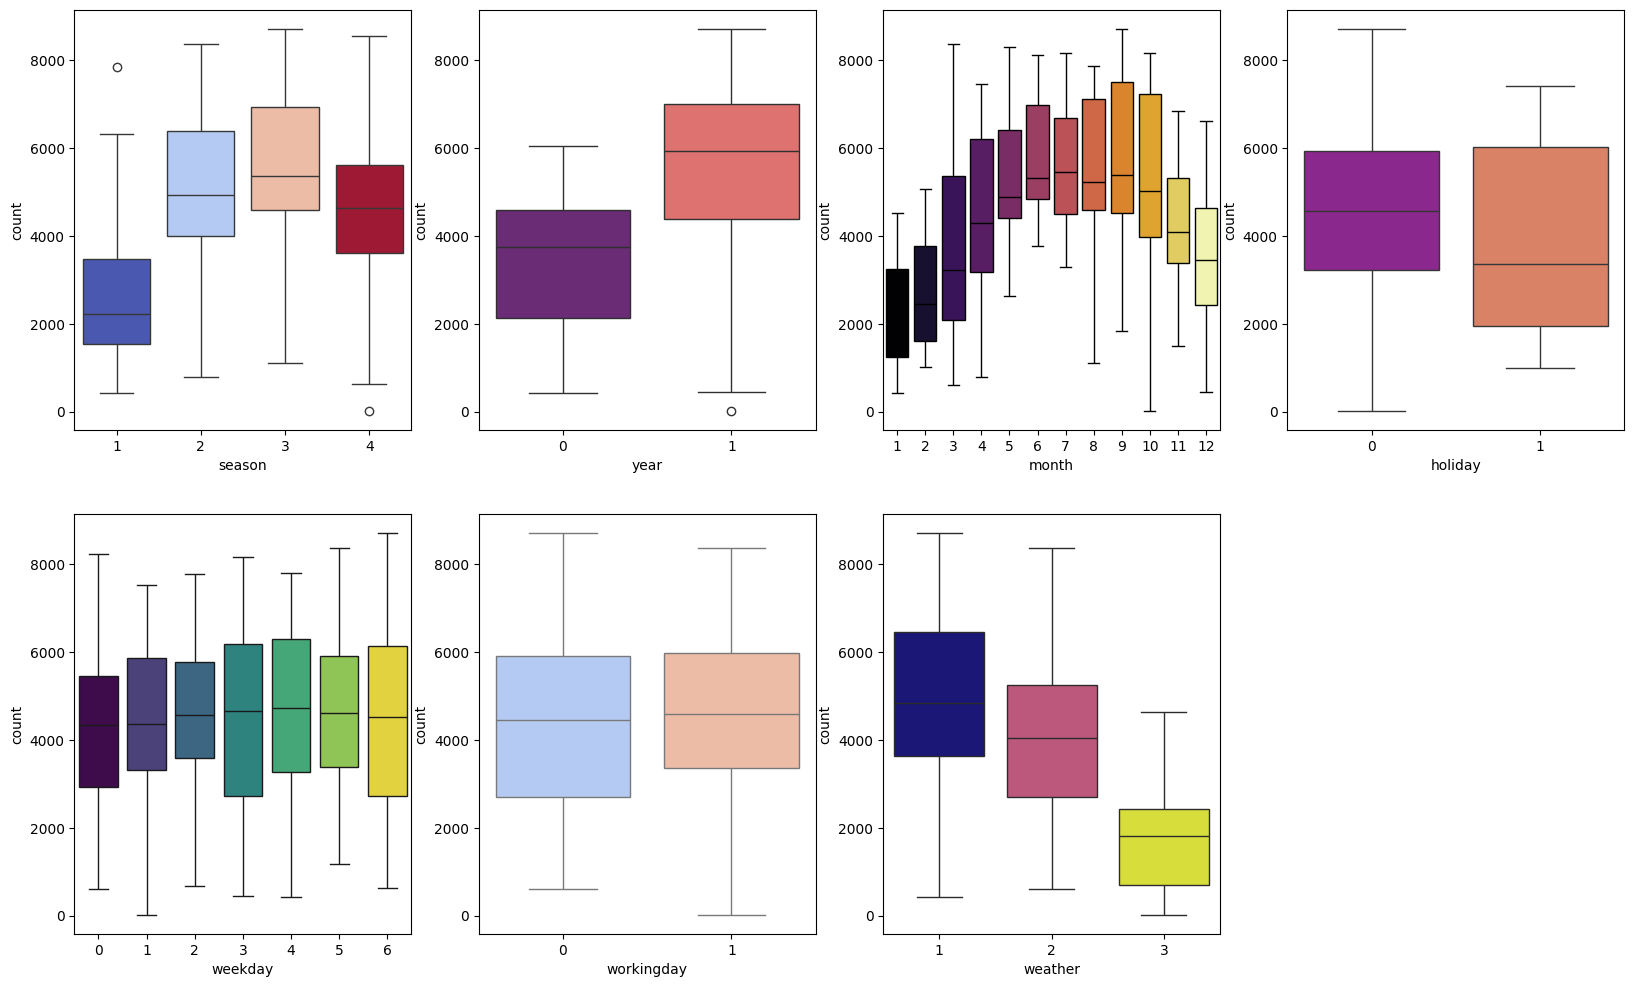

In [555]:
# Ploting the distribution of the target variable 'count' against multiple categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = boombikes, palette = 'coolwarm', hue='season', legend=False)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = boombikes, palette = 'magma', hue='year', legend=False)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = boombikes, palette = 'inferno', hue='month', legend=False)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = boombikes, palette = 'plasma', hue='holiday', legend=False)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = boombikes, palette = 'viridis', hue='weekday', legend=False)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = boombikes, palette = 'coolwarm', hue='workingday', legend=False)
plt.subplot(2,4,7)
sns.boxplot(x = 'weather', y = 'count', data = boombikes, palette = 'plasma', hue='weather', legend=False)

plt.show()

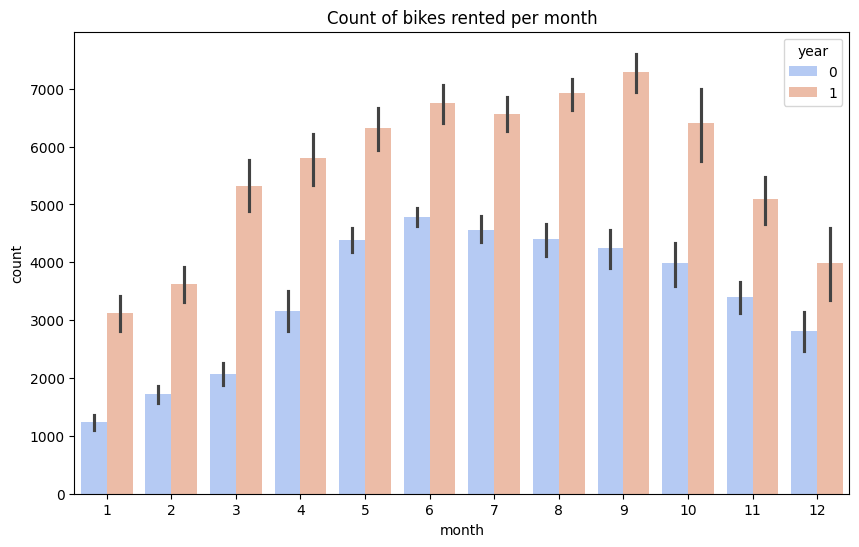

In [556]:
# Ploting the distribution of the target variable 'count' against month and year
plt.figure(figsize=(10, 6))
plt.title('Count of bikes rented per month')
sns.barplot(x = 'month', y = 'count', data = boombikes, palette = 'coolwarm', hue='year')
plt.show()

## Let's now analyze impact of numerical variables on the target variable.

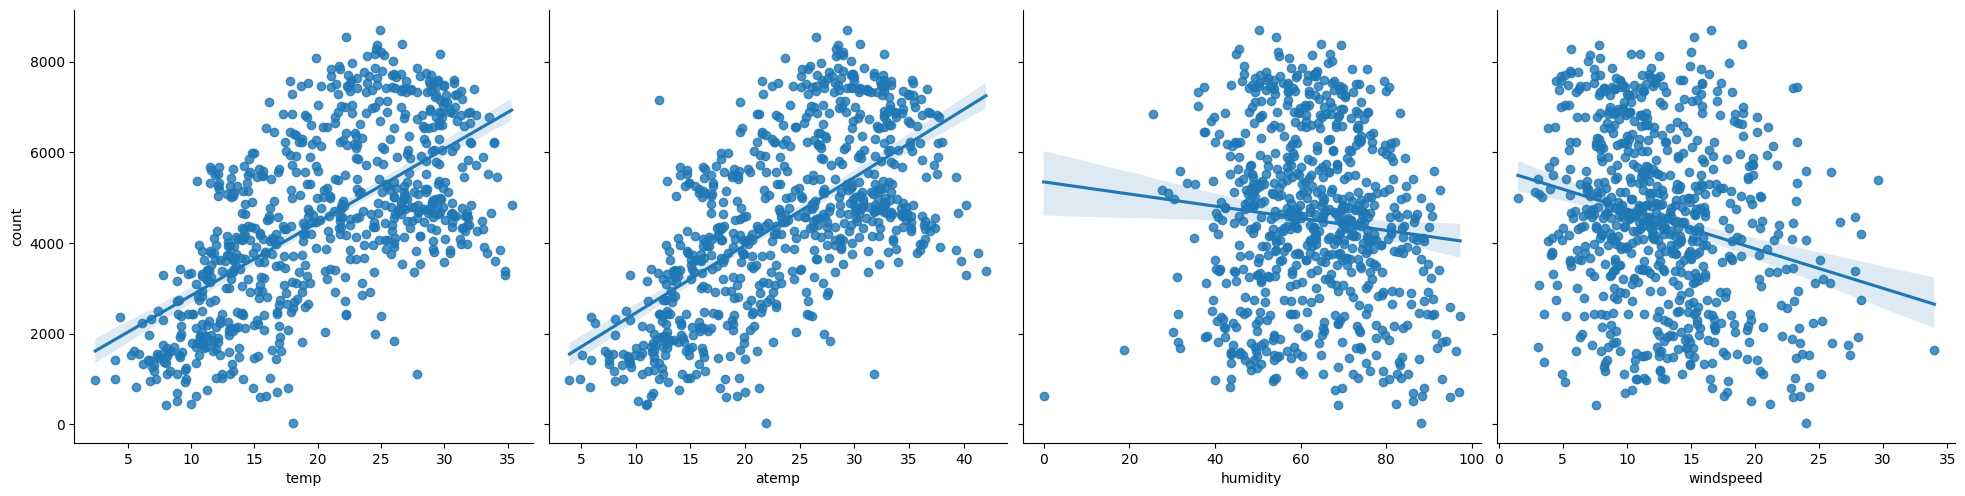

In [557]:
# Ploting the distribution of the target variable 'count' against multiple numerical variables 
# to understand the impact of these variables on the demand of bikes.

sns.pairplot(boombikes, x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars='count', height=5, aspect=1, kind='reg', palette='viridis')
plt.show()

### Observation:
Following observations can be made from above charts.

1. Demand for bike increases as the temperature increases. People avoid to use bike during colder weather.
2. Demand for bike is more when windspeed is less.

## Let's see the correlation between variables in the dataset.

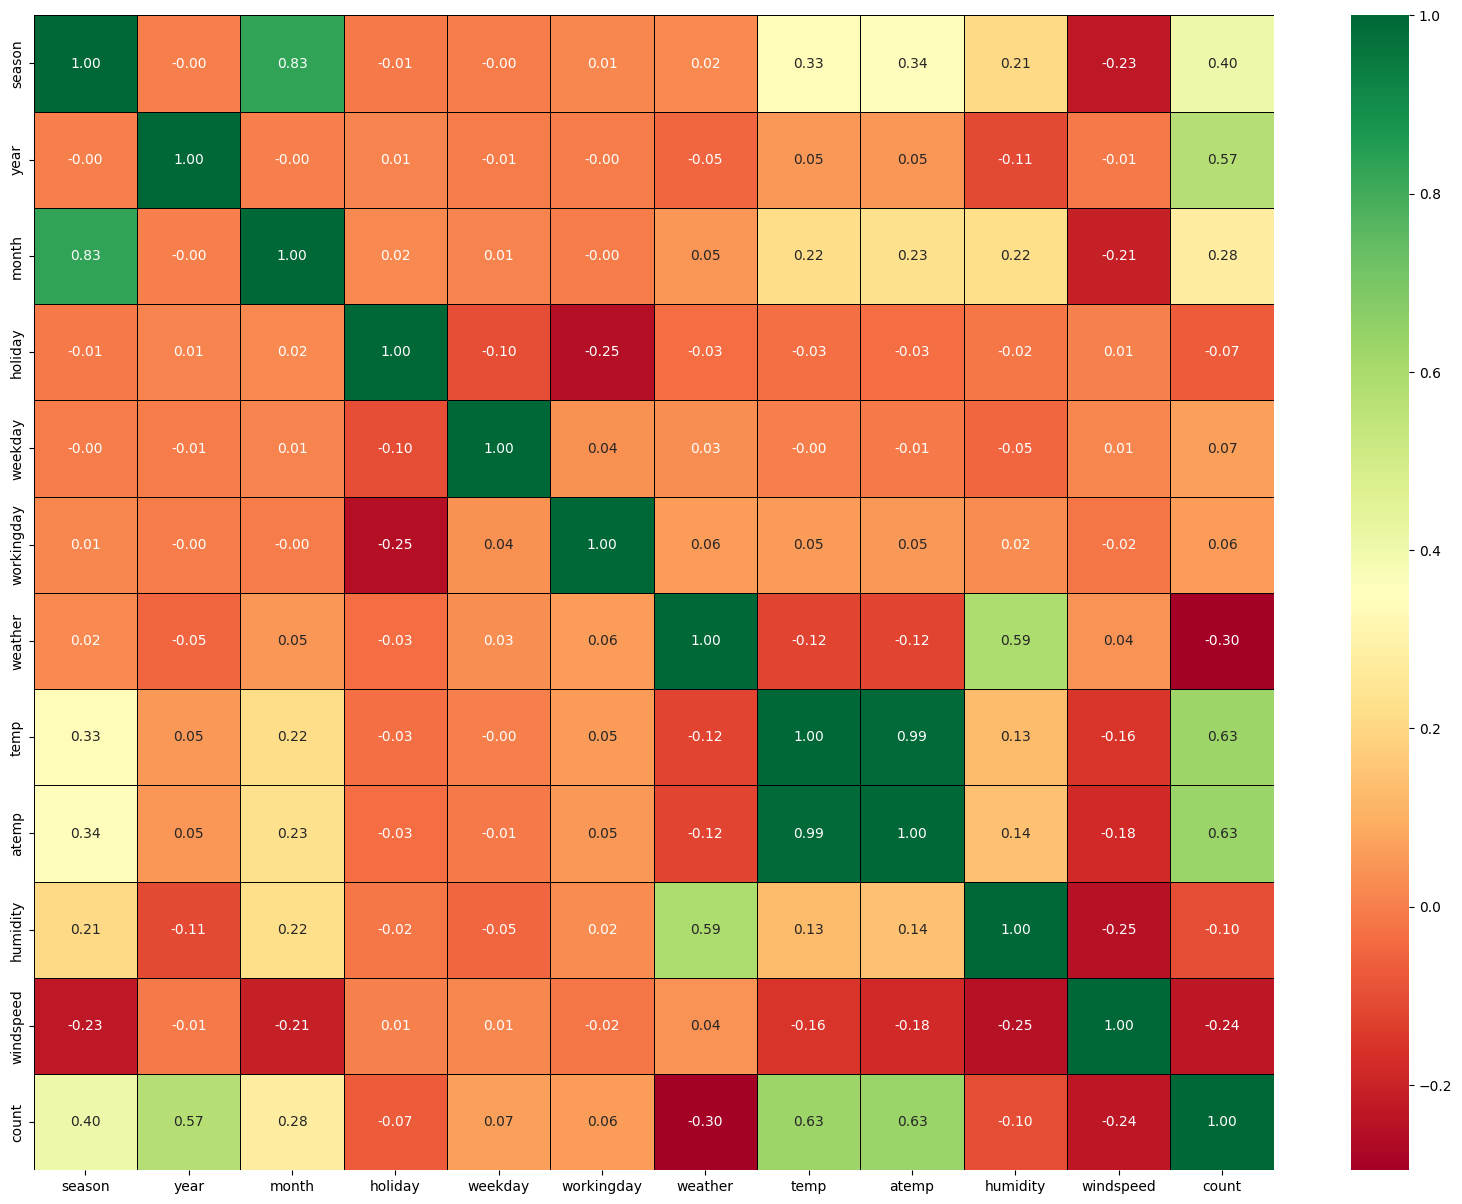

In [558]:
# Plotting a heatman to understand the correlation between the numerical variables.

numric_var = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

plt.figure(figsize=(20, 15))
sns.heatmap(boombikes.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

### Observation:
Following observations can be made from above charts.

1. temp and atemp are highly correlated and they have the same correlation with the bikes demand.
2. Windspeed and humidy have negative impact on the demands of bikes.
3. While windspeed is negatively correlated with temp, humidity is positively correlated with temp.
4. Bike demand tend to increase with higher temperature and decrease as windspeed increase as it is observed in earlier plots.

In summary, temp, atemp, season, year, humidity and windspeed are correlated to 'count' variable. Also other variables are correlated. With the help of above graph and interpration we can idenfity the variables which can be usefull in building the model.

Hence, we can consider using Linear Regression Model in this case.

In [559]:
# temp and atemp are highly correlated, so we can drop one of the variable.
# Dropping the variable 'atemp' as it is highly correlated with 'temp'.
boombikes = boombikes.drop(['atemp'], axis=1)

#### Creating dummy variables.

In [560]:
# Creating dummy variables for month.
Months = pd.get_dummies(boombikes['month'], dtype=int)
Months.rename(columns={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
                      6:'Jun', 7:'Jul',8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
Months.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [561]:
boombikes = pd.concat([boombikes, Months], axis=1)
boombikes.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [562]:
# Dropping 'month' column as dummy variables are created for the same.
boombikes = boombikes.drop('month', axis=1)

# Droping one of the dummy variable to avoid multicollinearity
boombikes = boombikes.drop(['Dec'], axis=1)

In [563]:
# Creating dummy variables for season.

Seasons = pd.get_dummies(boombikes['season'], dtype=int, drop_first=True)
Seasons.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
Seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [564]:
boombikes = pd.concat([boombikes, Seasons], axis=1)

# Dropping 'season' column as dummy variables are created for the same.
boombikes = boombikes.drop('season', axis=1)

In [565]:
# Creating dummy variables for weekday.

Weekdays = pd.get_dummies(boombikes['weekday'], dtype=int, drop_first=True)
Weekdays.rename(columns={0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
Weekdays.head()

,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [566]:
boombikes = pd.concat([boombikes, Weekdays], axis=1)

# Dropping 'weekday' column as dummy variables are created for the same.
boombikes = boombikes.drop('weekday', axis=1)

In [567]:
boombikes.shape

(730, 28)

In [568]:
# Creating dummy variables for weather.

Weather = pd.get_dummies(boombikes['weather'], dtype=int, drop_first=True)
Weather.rename(columns={1:'Clear', 2:'Mist', 3:'Light Rain', 4:'Heavy Rain'}, inplace=True)
Weather.head()

,Mist,Light Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [569]:
boombikes = pd.concat([boombikes, Weather], axis=1)

# Dropping 'weather' column as dummy variables are created for the same.
boombikes = boombikes.drop('weather', axis=1)

boombikes.shape

(730, 29)

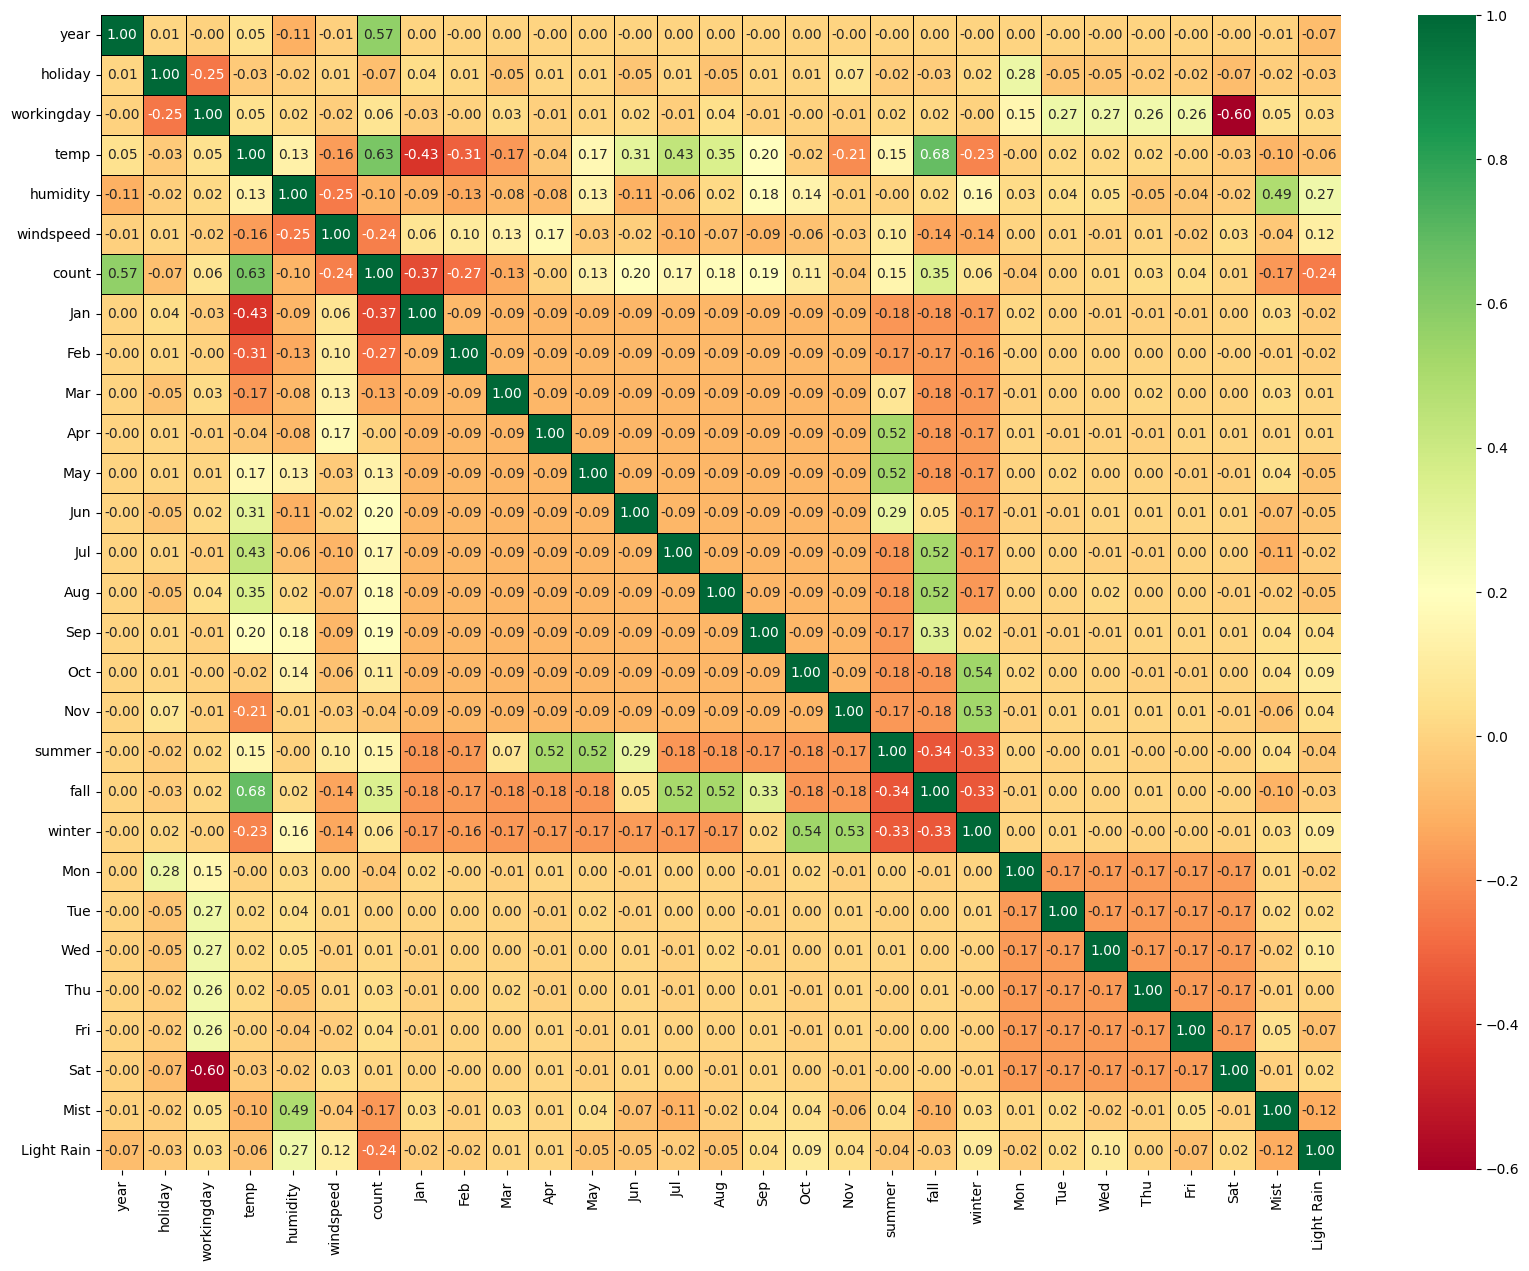

In [570]:
# Let's check correlation between the variables one more time.

plt.figure(figsize=(20, 15))
sns.heatmap(boombikes.corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

From the above chart, it is visible that Fall season, Summer season, temperature, May-Oct months, Clear weather have good influence on the demand of bikes.

### Splitting data into training and test sets.

In [571]:
# importing other required modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [572]:
df_train, df_test = train_test_split(boombikes, test_size=0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(511, 29)
(219, 29)


Rescaling features.

In [573]:
scaler = MinMaxScaler()

scaler_vars = ['temp', 'humidity', 'windspeed', 'count']

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,511.0,0.508806,0.500412,0.0,0.000000,1.000000,1.000000,1.0
holiday,511.0,0.025440,0.157613,0.0,0.000000,0.000000,0.000000,1.0
workingday,511.0,0.677104,0.468042,0.0,0.000000,1.000000,1.000000,1.0
temp,511.0,0.537386,0.225640,0.0,0.341151,0.542077,0.735215,1.0
humidity,511.0,0.650333,0.145741,0.0,0.538858,0.653499,0.754401,1.0
windspeed,511.0,0.320844,0.169639,0.0,0.199179,0.298098,0.414438,1.0
count,511.0,0.514186,0.224737,0.0,0.356765,0.519673,0.688737,1.0
Jan,511.0,0.088063,0.283664,0.0,0.000000,0.000000,0.000000,1.0
Feb,511.0,0.066536,0.249461,0.0,0.000000,0.000000,0.000000,1.0
Mar,511.0,0.097847,0.297399,0.0,0.000000,0.000000,0.000000,1.0


In [574]:
# Prepare the training data for modelling

y_train = df_train.pop('count')
X_train = df_train
print(X_train.shape)
print(y_train.shape)
print(y_train.sample(5))

(511, 28)
(511,)
481    0.714565
263    0.498159
660    0.856420
343    0.364473
514    0.786125
Name: count, dtype: float64


In [575]:
# imporing modules for RFE and Linear Regression
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [576]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [577]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Jan', False, 12),
 ('Feb', False, 11),
 ('Mar', False, 9),
 ('Apr', False, 7),
 ('May', False, 6),
 ('Jun', False, 8),
 ('Jul', False, 10),
 ('Aug', False, 4),
 ('Sep', True, 1),
 ('Oct', False, 5),
 ('Nov', False, 14),
 ('summer', True, 1),
 ('fall', False, 13),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1),
 ('Thu', True, 1),
 ('Fri', True, 1),
 ('Sat', False, 3),
 ('Mist', False, 2),
 ('Light Rain', True, 1)]

In [578]:
# Creating a list of RFE supported columns
sel_features = X_train.columns[rfe.support_]
sel_features

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Sep',
       'summer', 'winter', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Light Rain'],
      dtype='object')

In [579]:
X_train.columns[~rfe.support_]

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Oct', 'Nov',
       'fall', 'Sat', 'Mist'],
      dtype='object')

### Building Model

In [580]:

X_train_rfe = X_train[sel_features]

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          2.07e-181
Time:                        18:59:07   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.0

In [581]:
# Caclulating VIF for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

/Users/ranparc/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
9,Mon,inf
10,Tue,inf
11,Wed,inf
12,Thu,inf
13,Fri,inf
4,humidity,10.95
3,temp,7.21
5,windspeed,3.59


In [582]:
# Dropping 'Fri' as it has very low significance and high VIF

X_train_rfe = X_train_rfe.drop('Fri', axis=1)

# Rebuilding the model after dropping 'Fri'
X_train_rfe = sm.add_constant(X_train_rfe)

sm_model = sm.OLS(y_train, X_train_rfe).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          2.07e-181
Time:                        18:59:07   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -956.3
Df Residuals:                     496   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.543      0.0

In [583]:
X_train_rfe = X_train_rfe.drop('const', axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,humidity,10.95
2,workingday,7.47
3,temp,7.21
5,windspeed,3.59
9,Mon,2.29
11,Wed,2.27
12,Thu,2.06
10,Tue,2.05
0,year,2.03
8,winter,1.64


In [584]:
# Dropping 'Fri' as it has very low significance.

X_train_rfe = X_train_rfe.drop('Wed', axis=1)

# Rebuilding the model after dropping 'Wed'
X_train_rfe = sm.add_constant(X_train_rfe)

sm_model = sm.OLS(y_train, X_train_rfe).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.5
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          1.48e-182
Time:                        18:59:07   Log-Likelihood:                 493.13
No. Observations:                 511   AIC:                            -958.3
Df Residuals:                     497   BIC:                            -898.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2576      0.027      9.555      0.0

In [585]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,humidity,10.95
3,temp,7.21
2,workingday,4.52
5,windspeed,3.59
0,year,2.03
8,winter,1.64
9,Mon,1.64
7,summer,1.58
10,Tue,1.47
11,Thu,1.47


In [586]:
# Dropping 'humidity' as it has very low high VIF.
X_train_rfe = X_train_rfe.drop('humidity', axis=1)

# Rebuilding the model after dropping 'humidity'
X_train_rfe = sm.add_constant(X_train_rfe)
sm_model = sm.OLS(y_train, X_train_rfe).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sun, 11 Feb 2024   Prob (F-statistic):          3.64e-168
Time:                        18:59:07   Log-Likelihood:                 456.21
No. Observations:                 511   AIC:                            -886.4
Df Residuals:                     498   BIC:                            -831.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0766      0.019      4.100      0.0

In [587]:
# X_train_rfe = X_train_rfe.drop('const', axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,17.72
3,workingday,1.51
9,Mon,1.39
10,Tue,1.27
11,Thu,1.27
2,holiday,1.25
8,winter,1.21
4,temp,1.18
7,summer,1.18
6,Sep,1.10


#### Residual Analysis

In [588]:
y_train_pred = sm_model.predict(X_train_rfe)
res = y_train - y_train_pred
res

653    0.170045
576    0.083741
426   -0.060226
728   -0.150825
482   -0.106764
         ...   
578    0.036499
53     0.023064
350    0.028185
79    -0.110438
520    0.113491
Length: 511, dtype: float64

<Figure size 1000x600 with 0 Axes>

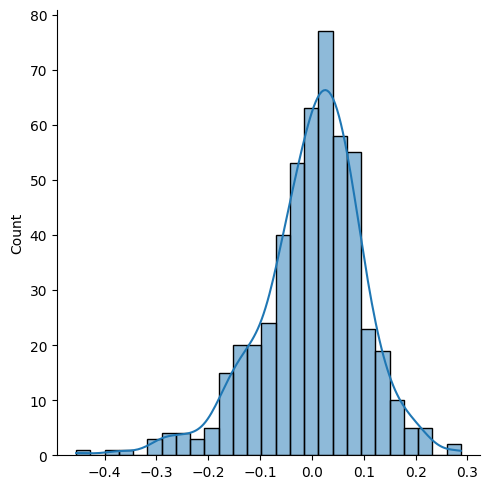

In [593]:
plt.figure(figsize=(10, 6))
sns.displot(res, kde=True)
plt.show()

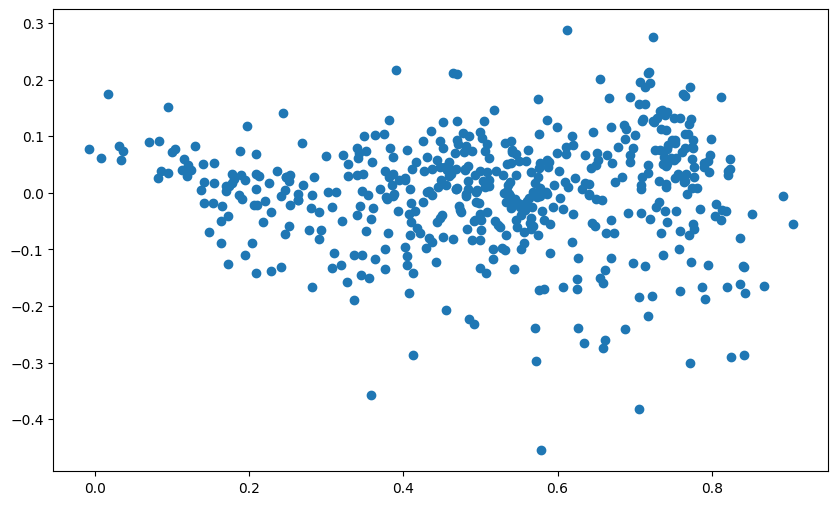

In [597]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, res)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

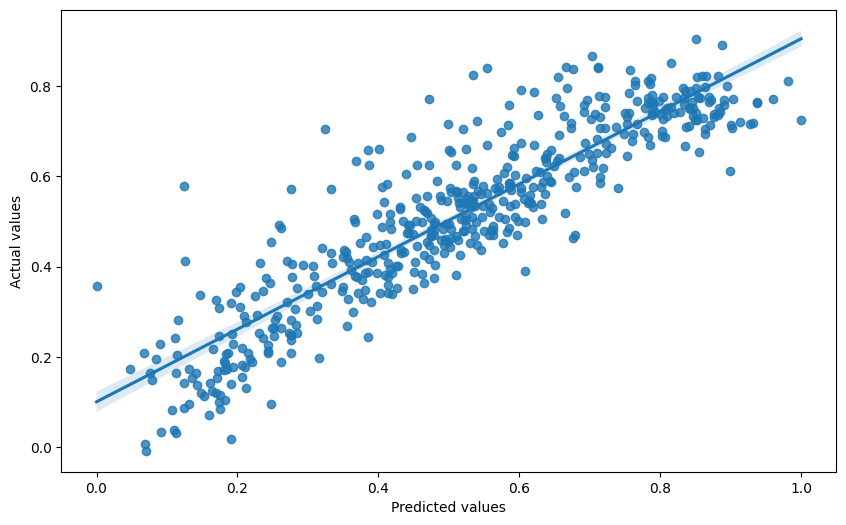

In [606]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_train, y=y_train_pred)
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.show()